In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
from pathlib import Path

import altair as alt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Statistics on comments

In [3]:
#read comments stored in multiple csv files in a folder and concat them all in one df. Remove duplicates if there are any.

In [4]:
def read_folder(csv_folder):
    ''' Input is a folder with csv files; return list of data frames.'''
    csv_folder = Path(csv_folder).absolute()
    csv_files = [f for f in csv_folder.iterdir() if f.name.endswith('csv')]
    # the assign() method adds a helper column
    dfs = [
        pd.read_csv(csv_file)for idx, csv_file in enumerate(csv_files, 1)
    ]
    return dfs

In [5]:
def concat_csv_files(folder_name='data_raw/comments'):
    dfs = read_folder(folder_name)
    all_comments_df = pd.DataFrame()
    for df in dfs:
        df = df.drop(['Unnamed: 0'], axis=1)
        all_comments_df = pd.concat([all_comments_df, df]).drop_duplicates().reset_index(drop=True) 
    return all_comments_df

In [6]:
all_comments_df = concat_csv_files()

In [23]:
all_comments_df.shape

(1177029, 12)

In [8]:
def sort_df_by(column_name):
    comments_per_video = pd.DataFrame(
        all_comments_df[column_name].value_counts()
    ).rename(
        columns={
            column_name: 'comment_count'}
    ).reset_index()
    return comments_per_video

In [9]:
comments_per_video = sort_df_by('video_id')

In [10]:
comments_per_user  = sort_df_by('authorChannelId')

In [11]:
comments_per_video.head()

index  comment_count
0  eRLJscAlk1M         162297
1  XAi3VTSdTxU         153030
2  ipVxxxqwBQw          44196
3  cvIiZc6uAXA          43544
4  wbR-5mHI6bo          40498

In [12]:
comments_per_video[:10]

index  comment_count
0  eRLJscAlk1M         162297
1  XAi3VTSdTxU         153030
2  ipVxxxqwBQw          44196
3  cvIiZc6uAXA          43544
4  wbR-5mHI6bo          40498
5  OWXoRSIxyIU          30313
6  w_DTa0H024A          26795
7  6EFHZfISGp4          22728
8  RLqXkYrdmjY          19400
9  oJAbATJCugs          18715

In [13]:
alt.Chart(comments_per_video[:10]).mark_bar().encode(
    x = alt.X('comment_count:Q', title= 'Video Id'),
    y = alt.Y('index:N', title= 'Number of comments', sort='-x')
).properties(
    title={
      "text": ["Top 10 commented videos"],
      "color": "black"  
    }
)

alt.Chart(...)

In [107]:
comments_per_user.head()

index  comment_count
0  UCLEVmaG37naMm8rXstapjjQ           4101
1  UCh40_8TY9WBA3WsYeSHMwtA           2277
2  UC-NmIvin1ZbX4TfZLS9ZHMg           1706
3  UCaVz3_NLksSBzFwNAQn-WOQ           1432
4  UCdBHd9VL3yMJ1UHp6pypZXg           1239

In [14]:
alt.Chart(comments_per_user[:10]).mark_bar().encode(
    x = alt.X('comment_count:Q', title= 'User Id'),
    y = alt.Y('index:N', title= 'Number of comments', sort='-x')
).properties(
    title={
      "text": ["Top 10  users with most comments"],
      "color": "black"  
    }
)

alt.Chart(...)

In [ ]:
all_comments_df

In [22]:
all_comments_df.head()

id  replyCount  likeCount          published_at  \
0  Ugw_Q_5TEdKb0aFMls94AaABAg         0.0        0.0  2021-02-12T08:03:13Z   
1  UgzcdsGz9l2lLDK5wPF4AaABAg         0.0        0.0  2021-02-10T07:19:12Z   
2  UgwdASJmWZyTKX9DJ4F4AaABAg         0.0        0.0  2021-02-01T03:38:05Z   
3  UgxhycLINnjG3mXlc2Z4AaABAg         1.0        0.0  2021-01-30T17:57:20Z   
4  UgxhycLINnjG3mXlc2Z4AaABAg         0.0        0.0  2021-02-13T14:12:15Z   

        author_name  \
0             cruhg   
1  Fletcher Daniels   
2   rhymeswithteeth   
3   rhymeswithteeth   
4      Matty Groves   

                                                                                                                                                                                                                                                                                                                                     text  \
0                                                                                                                                                                                                                                                                          i suppose the rest of this amazing skit was banned off youtube   
1                                                                                                                                                                                                                                                                                            Watch the full version. It’s so much better.   
2                                                                                                                                                                                                                                                     This is only a portion of the entire Greta Thunberg sketch. Where's the rest, GWPF?   
3  Interestingly, you can't find this comedy routine on Comedy Unleashed's YouTube page. It's been scrubbed off the page. I guess Comedy Unleashed's slogan, "Free Thinking Comedy Club. No Self Censorship. If It's Funny, It's Funny", doesn't apply to Will Franken's routine...too edgy for them, even. Seems supremely hypocritical.   
4                                                                                                                                                                                                                                                Yep.   He was cancelled by Comedy Unleashed for using his free speech to criticize them.   

            authorChannelId  is_reply                    threadId  \
0  UCuaPGilCg2ex-mm1FekefcA       0.0  Ugw_Q_5TEdKb0aFMls94AaABAg   
1  UCJnQ8E1C5Mqr2-ZfBezxEOw       0.0  UgzcdsGz9l2lLDK5wPF4AaABAg   
2  UC1xAbwWReoezgoF1oMGVdMA       0.0  UgwdASJmWZyTKX9DJ4F4AaABAg   
3  UC1xAbwWReoezgoF1oMGVdMA       0.0  UgxhycLINnjG3mXlc2Z4AaABAg   
4  UCPnkqq5hKL8-bAKexApHv7w       1.0  UgxhycLINnjG3mXlc2Z4AaABAg   

      video_id    video_published_at           search_term  
0  golAjKMDuVk  2019-05-22T15:29:45Z  climate change greta  
1  golAjKMDuVk  2019-05-22T15:29:45Z  climate change greta  
2  golAjKMDuVk  2019-05-22T15:29:45Z  climate change greta  
3  golAjKMDuVk  2019-05-22T15:29:45Z  climate change greta  
4  golAjKMDuVk  2019-05-22T15:29:45Z  climate change greta

In [24]:
def stats(name_csv_or_df: "pd.DataFrame or str") -> pd.DataFrame:
    """
    Creates basic statistics for a given DataFrame or csv file.
    """
    if(isinstance(name_csv_or_df, str)):
        df = pd.read_csv('data_raw/' + name_csv_or_df)
        name = name_csv_or_df
    elif(isinstance(name_csv_or_df, pd.DataFrame)):
        df = name_csv_or_df
        name = None
    else:
        raise TypeError("stats() takes pandas.DataFrame or string as input.")
        
    num_comments = df.shape[0]
    num_authors = len(df.authorChannelId.value_counts())
    num_single_comment_authors = sum(df.authorChannelId.value_counts()==1)
    return pd.DataFrame([[name, num_comments, num_authors, num_single_comment_authors, num_comments/num_authors, df.authorChannelId.value_counts()[0], df.authorChannelId.value_counts().index[0]]], columns=["csv_name", "number_comments", "number_authors", "number_single_comment_authors", "average_comment_count", "most_comments", "user_with_most_comments"]) 

In [25]:
sum(all_comments_df.authorChannelId.value_counts()>30)

1269

In [26]:
stat = stats(all_comments_df)

In [27]:
stat

csv_name  number_comments  number_authors  number_single_comment_authors  \
0     None          1177029          678188                         523249   

   average_comment_count  most_comments   user_with_most_comments  
0                1.73555           4101  UCLEVmaG37naMm8rXstapjjQ

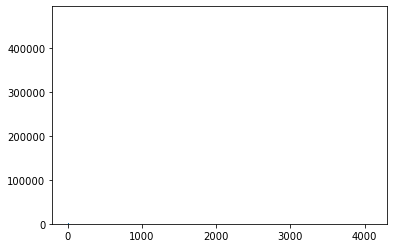

In [28]:
hist = plt.hist(all_comments_df.author_name.value_counts(), bins=[i for i in range(stat.most_comments[0])] )

In [29]:
df = all_comments_df
g = df.groupby(["author_name", "text"]).size().reset_index()
g[g[0]>10]

author_name  \
5221                          200damary   
13217                       A mans shed   
20097                       Aaron Oneal   
20100                       Aaron Oneal   
29070                  Adrian Whitworth   
49143                 Allysandra Ilagan   
49145                 Allysandra Ilagan   
57463                    Anderson Alves   
81331                             As 13   
81337                             As 13   
107103                 Bernard Blankson   
111241                      Bigtymer781   
122984                          Bolt LP   
130671                   Brian Ferguson   
175927                 Cleilton Azevedo   
177975                         Coco brt   
184635   Coronavirus outbreak Map . Com   
189615                    Crooked Media   
191036                 Culture Festival   
211520            Darren's General Info   
261185                        Edward L.   
284371                 Exemplary Nature   
337643                    Gregory Byrne   
343629                         HOLYbots   
350741                    Harvey Ibarra   
358276                      Hidden Love   
362482                    Hosni Mubarak   
376721    Infinite Waters (Diving Deep)   
389213                           JBCJBC   
409226                     Jason Melton   
435916                           John P   
439158                      Johnny Axon   
459825                           Justme   
476102                            Ken R   
479358                        Kevin Lee   
489721                      Kony Church   
500879                  Lamonike Msanii   
503653                            Laura   
506329                       Lea Heller   
512267                         Letstute   
512314                         Letstute   
513719                     Lia Asatryan   
518175                      Linda Pryor   
520804             LivingIn PatheticEra   
525168                     Lorenzo Blum   
525179                     Lorenzo Blum   
525190                     Lorenzo Blum   
525204                     Lorenzo Blum   
557074                     Marilyn Maul   
586353            Michael Jackson Edits   
586354            Michael Jackson Edits   
593504                      Mike Ledner   
593505                      Mike Ledner   
598002                  Mireya Bogisich   
598867                    Miss Scarlett   
608020                         Mr Brown   
706449                         Rad tech   
707382                     Rafael Roces   
709412               Rajadhiraj Maharaj   
731352   RightFit Fitness & Performance   
733452                        Rngnd1314   
736925                     Robert Reich   
743725                    Ronald Greene   
757757                      SUPER Payán   
761457                   Sally Portillo   
769702                   Sarah McKinley   
776508                 Sean Lockman Jr.   
793523                       Simon Dahl   
810171                Spooky Filmz Ent.   
810173                Spooky Filmz Ent.   
828230                     Susan Ricker   
841204                   Tarun Gopinath   
900751                          Vance H   
903984                         Very Hot   
903985                         Very Hot   
907941               Vinny Sudheer Mako   
908255                    Violent_Bebop   
913494               WILD NATURE BRAZIL   
925018                  Willian da rosa   
925020                  Willian da rosa   
954083                        adam bend   
958963                              amf   
961114                     anna klassen   
961115                     anna klassen   
983220                        cece123pg   
995805                    delorean 1987   
1024078                             hg2   
1066657                        maxis me   
1088465                      paul smith   
1112413                    shiva koliar   
1119231            spoike dainja leslay   
1125327                  tattboy Holden   
1151856                      

In [30]:
g = df.groupby(["author_name", "video_id"]).size().reset_index()
g[g[0]>10]

author_name     video_id     0
97                                              #InThe Butt  OWXoRSIxyIU    12
397                                            *Steel Beam*  wbR-5mHI6bo    14
450                                              *sips tea*  XAi3VTSdTxU    14
597                                     - Schattenpflanze -  p7LDk4D3Q3U    41
694                                                      --  eRLJscAlk1M    12
719                                                     -4*  OWXoRSIxyIU    36
723                                                     -4*  ewJ6TI8ccAw    12
1009                                               . Wookey  WVc-Y-mJ_uY    14
1121                                               0 forged  _Ig6FbaDA8A    15
1211                                         00DinamoUSee00  rBvt1mZfwSE    31
1413                                                0IIIIII  9UCdFbyL8y0    18
1462                                        0hhtec Musician  47bNzLj5E_Q    15
1830                                       1000subsnovideos  ipVxxxqwBQw    11
1956                                             11 Creeper  TbW_1MtC2So    15
2167                                              123fouruu  XAi3VTSdTxU    15
2230                                               12sb4813  6EFHZfISGp4    14
2386                                                157 157  WVc-Y-mJ_uY    40
2476                                              177SCmaro  wbR-5mHI6bo    19
2515                         1800-ring-a-ding -my-dingaling  S6GodWn4XMM    56
2591                                                   1911  GxIDJWCbk6I    12
2622                                                1965ace  FJUA4cm0Rck    68
2623                                                1965ace  M2Jxs7lR8ZI    25
2624                                                1965ace  eNx9tvCrvv8    35
2685                                       1984 THEBEGINING  w_DTa0H024A    14
3059                                               1p6t1gms  9UCdFbyL8y0    17
3245                                              200damary  XAi3VTSdTxU   191
3418                                       21st Century Man  eRLJscAlk1M    14
3469                                              22Seij Ca  yqgMECkW3Ak    12
3804                                         2Truth4Liberty  FJUA4cm0Rck    21
4017               3.14159265358979323846 26433832795028841  eRLJscAlk1M    12
4196                                               3576alan  OWXoRSIxyIU    29
4374                                            3dv1n G4mer  wbR-5mHI6bo    13
4401                                                3lift X  cvIiZc6uAXA    11
4573                                            420 247 365  r4_SS3cOJrw    11
4585                                     420 Style Tomatoes  VGP6uDPUi3o    25
4900                                       4nlimited3dition  UgOV1dYdYVk    17
5349                                        666Lachrimae666  _Ig6FbaDA8A    15
5405                                               6942pjka  C6u1uKznCYw    19
5670                                           777peacelove  XAi3VTSdTxU    12
5676                                             77Avadon77  yqgMECkW3Ak    11
5767                                     7kikoae77 Villamor  um2Q9aUecy0    27
5786                                               7thSense  UgOV1dYdYVk    13
5864                      82920193874728290201817839 828282  wbR-5mHI6bo    12
5941                                          88CrazyLegs88  HHP9Rh-ooh0    25
6002                                            8FORME1FORU  w_DTa0H024A    21
6011                                                 8Robba  ewJ6TI8ccAw    13
6028                                            8dreadLock8  XAi3VTSdTxU   323
6193                                              9753flyer  OWXoRSIxyIU    12
6561                                                      A  eRLJscAlk1M    30
6596                                         A 4d tesseract  ipVxxxqwBQw    17
6684               

In [41]:
# Look closer at one comment. All posted by the same user:
df[df.text=="Big Guy and  his side kick Kamel toe Harris making CHINA Great again ...."]

Empty DataFrame
Columns: [id, replyCount, likeCount, published_at, author_name, text, authorChannelId, is_reply, threadId, video_id, video_published_at, search_term]
Index: []

In [ ]:
df[df.text=="planet will warm up and it will be Paradise time again"]

In [31]:
# Users who commented under more than a single video:
g = all_comments_df.groupby(["authorChannelId"])["video_id"].nunique().reset_index()
#g[g.video_id>1]

In [38]:
g[g.video_id>40]

authorChannelId  video_id
15698   UC0TPdvG3xiLwzMJbdJzNw5g        51
130710  UCBKt3KZO4gq1qkf-tXFEcPA        55
162499  UCEJy93A2zYsZMlTlvD1eCtg        44
243498  UCLzHjaUH2lpygLyxdwUCbOA        47
304350  UCRkQNJYyK073PsjVao-SWCA        45
325189  UCTjA6jHHcAVRQY2dJSHscaQ        60
349819  UCW2qniYdhBhxq3llQIOEvOQ        49
354346  UCWTsXCpWs43jFLsiQv1N5EQ        42
371922  UCY7F_1S11P0JkIoaTCxSHcg        73
477395  UCh40_8TY9WBA3WsYeSHMwtA        41
483630  UCherSgfuX4ODBO5-pMrThYg        46
560773  UCov_MpgR7_57q7rmQPaCWPA        89

In [29]:
g[g.video_id>5]

author_name  \
150719    Sam Lair   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text  \
150719  As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).   

        video_id  
150719         6

In [44]:
df[df.authorChannelId=="UCLEVmaG37naMm8rXstapjjQ"]

id  replyCount  likeCount  \
717506  UgwfkyZ43DbqpPZJpf54AaABAg         0.0        0.0   
717507  UgwdgprAPl4UX3rCCSd4AaABAg         0.0        0.0   
717509  UgzO-J6g4yuDuxzeu1F4AaABAg         0.0        0.0   
717510  Ugxq6Led9_pCXwqjH4B4AaABAg         0.0        0.0   
717512  Ugzg6o1lCl6z7pCiUPh4AaABAg         0.0        0.0   
717533  UgwLRBTvVXB3TVOiDVl4AaABAg         0.0        0.0   
717561  Ugzj3y0sUz1d3ZlvV5J4AaABAg         0.0        0.0   
717607  Ugxu_6TiRPcLfxocjBV4AaABAg         0.0        0.0   
717608  Ugyo4DYZNAhqTViLuZR4AaABAg         0.0        0.0   
717648  UgyEoNTs67MBnYXK_JV4AaABAg         0.0        0.0   
717649  UgxBQgB-u4bpXwjF1xZ4AaABAg         0.0        0.0   
717660  Ugy4mUU7gLleABT346h4AaABAg         0.0        0.0   
717673  UgzvBMGqRXEdy0n14QB4AaABAg         0.0        0.0   
717693  Ugw2EC63UkCuDwxK0d94AaABAg         0.0        0.0   
717812  UgwURjWCS-BJWhNR-Jt4AaABAg         0.0        0.0   
717833  UgylseSntc9DFvvIB1Z4AaABAg         0.0        0.0   
717834  UgzXXKkzhQ8OgCBdauB4AaABAg         0.0        0.0   
717863  Ugxxh78yq2GKe_uLeWZ4AaABAg         0.0        0.0   
717871  Ugy3_DAMBqX6o52GW1l4AaABAg         0.0        0.0   
717972  Ugx9bDeZm6Ma0KSInZZ4AaABAg         0.0        0.0   
717987  UgwFzSEcbK35VNA_WEJ4AaABAg         0.0        0.0   
717994  UgwhBCzg2DmFSZyRQzR4AaABAg         0.0        0.0   
717995  Ugy_tL0fyMY2WpUlPPN4AaABAg         0.0        0.0   
717996  Ugw-2z6aeoBh7w6PTFN4AaABAg         0.0        0.0   
718000  Ugw-bNc8YQEvO9rbnXB4AaABAg         0.0        0.0   
718010  Ugwqmn1tG-vQF4RyiQ14AaABAg         0.0        0.0   
718019  UgztdXDeJAkeQdLtF-14AaABAg         0.0        0.0   
718118  UgxwdP0qfUTn43w2VHx4AaABAg         0.0        0.0   
718119  UgwrrTByWch2KLmcmTN4AaABAg         0.0        0.0   
718148  UgxYqayhf-Iqi2yYpMB4AaABAg         0.0        0.0   
718151  UgzPEd4gmDfJkrGKCb14AaABAg         0.0        0.0   
718154  Ugz9Uto6Bii2i1sZbXZ4AaABAg         0.0        0.0   
718223  Ugz8BwlvSZnzy4S38kt4AaABAg         0.0        0.0   
718228  UgyCclaZIsPTM7wQxoF4AaABAg         0.0        0.0   
718261  Ugz1tuaRbonYCTU-6lJ4AaABAg         0.0        0.0   
718263  UgwK4LAdMVq2e6T47B94AaABAg         0.0        0.0   
718267  UgzEHu5jPz8hDKQyMqJ4AaABAg         0.0        0.0   
718749  UgzNa72Y_3VnPNRU-5R4AaABAg         0.0        0.0   
718759  Ugwnykv_m0_HPdN-T_B4AaABAg         0.0        0.0   
718760  UgxO8AhQ-GmfXJFVD9Z4AaABAg         0.0        0.0   
718765  UgxIuy0IUJknuuAq8Xh4AaABAg         0.0        0.0   
718788  Ugwso44j8Oh-1otaj5J4AaABAg         0.0        0.0   
718806  UgxkbffZPoRhUgP59U54AaABAg         0.0        0.0   
718810  Ugw6SaJynhyeJA7zbeF4AaABAg         0.0        0.0   
718811  UgzevbMY-gRBivGKott4AaABAg         0.0        0.0   
718823  Ugz1jqyAFC0gEhu7_-x4AaABAg         0.0        0.0   
718824  UgwuFGxxdux7c3ylw2R4AaABAg         0.0        0.0   
718827  UgzXD6HMVNhwT79OVCt4AaABAg         0.0        0.0   
718828  Ugw6SqO2HHqR2oce_ZR4AaABAg         0.0        0.0   
718830  UgxuOwIpPVzCVrb9G2V4AaABAg         0.0        0.0   
718831  Ugzp7acRWdEntffPS1l4AaABAg         0.0        0.0   
718832  Ugxaax0Of7CxRSenTS94AaABAg         0.0        0.0   
718875  Ugy_uBAYoNjPgD3_Un54AaABAg         0.0        0.0   
718890  Ugy8F-IRSP_zJx2p17J4AaABAg         0.0        0.0   
718891  UgwIr26f1sPwobyTgLt4AaABAg         0.0        0.0   
718892  Ugz7DDNTQKR1uLdjfeh4AaABAg         0.0        0.0   
718897  Ugxuzs60LYK0PsMsibN4AaABAg         0.0        0.0   
718898  UgztDK21uWhknLd0f6B4AaABAg         0.0        0.0   
718903  UgyfSyI6XTTjDs3X5MB4AaABAg         0.0        0.0   
718908  UgwmTExt3AyowBSsEI54AaABAg         0.0        0.0   
718909  UgxZmF-OMApEuMeFqzN4AaABAg         0.0        0.0   
718910  UgwvIn0Gx7_9C3va6aN4AaABAg         0.0        0.0   
718915  Ugzoc3VsVQkJaL3R6WB4AaABAg         0.0        0.0   
718982  Ugy51b-30OdG1U8XkNN4AaABAg         0.0        0.0   
719064  UgzsqpDi70gw07GZ9FB4AaABAg         0.0        0.0   
719066

In [31]:
df[df.author_name=="Sam Lair"]

id                    threadId  \
10181  UgzQ76ASEto9SR9kT8B4AaABAg  UgzQ76ASEto9SR9kT8B4AaABAg   
11520  UgyzXi6LCJ8EuJx2Hs14AaABAg  UgyzXi6LCJ8EuJx2Hs14AaABAg   
12701  UgwB1Lxqj4AW2qDIDgV4AaABAg  UgwB1Lxqj4AW2qDIDgV4AaABAg   
13477  UgyZfIGiXiaFRfbJ_9B4AaABAg  UgyZfIGiXiaFRfbJ_9B4AaABAg   
13535  UgzkozbBDQtwl2wMi554AaABAg  UgzkozbBDQtwl2wMi554AaABAg   
14799  UgzmBk8BnapBMs4CtSN4AaABAg  UgzmBk8BnapBMs4CtSN4AaABAg   
14921  UgxKhGoTdT_40833R054AaABAg  UgxKhGoTdT_40833R054AaABAg   
15093  UgziBd7e7NU1ar3gERB4AaABAg  UgziBd7e7NU1ar3gERB4AaABAg   
18740  UgwBFPKORn5XzM4HTtB4AaABAg  UgwBFPKORn5XzM4HTtB4AaABAg   

               published_at author_name  \
10181  2019-12-25T18:11:28Z    Sam Lair   
11520  2020-02-05T20:14:31Z    Sam Lair   
12701  2019-12-25T18:11:04Z    Sam Lair   
13477  2020-11-12T19:52:05Z    Sam Lair   
13535  2019-12-25T18:05:56Z    Sam Lair   
14799  2019-12-25T18:19:49Z    Sam Lair   
14921  2019-12-25T18:28:58Z    Sam Lair   
15093  2019-12-25T18:10:08Z    Sam Lair   
18740  2019-12-25T18:11:46Z    Sam Lair   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
10181  As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).   
11520                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          What if global warming is a hoax and we create a better world for nothing; but, what it isn’t a hoax and we do nothing.   
12701  As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).   
13477                                                                                                                                                                                                                                                                                        

In [28]:
df.video_id.value_counts().to_csv("video_ids.csv")

In [31]:
df[df.author_name=="amf"].text.iloc[0]

'Would you bet your paycheck on a weather forecast for tomorrow? If not, then why should this country bet billions on global warming predictions that have even less foundation?'

In [32]:
df[df.author_name=="amf"].text.iloc[-1]

'Joe Biden once called state-mandated school integration “the most racist concept you can come up with,” and Barack Obama “the first sort of mainstream African American who is articulate and bright and clean.” He was a staunch opponent of “forced busing” in the 1970s, and leading crusader for mass incarceration throughout the ‘80s and ‘90s. Uncle Joe has described African-American felons as “predators” too sociopathic to rehabilitate — and white supremacist senators as his friends.⬅'

In [62]:
df[df.author_name=='reference2me']

id  replyCount  likeCount  \
165018  UgxN-qaXhFpdUvcf7Nh4AaABAg         NaN        0.0   
165240  UgzYZGNlKlMMRWPzU6J4AaABAg         NaN        3.0   
165241  UgzYZGNlKlMMRWPzU6J4AaABAg         NaN        2.0   
211861        Ugh8Fq9JZ-QhNHgCoAEC         NaN        0.0   
213106        UgijC3pKT5jZWXgCoAEC         NaN        0.0   
214354        Ugi5DxYircYHpHgCoAEC         NaN        0.0   
215999  UgysnlK5Pb-Jd8y-xkh4AaABAg         NaN        4.0   
218026  UgwRJjGTaYiTG9BPzWB4AaABAg         NaN        0.0   
219221        UgjrdvYR6O8VVngCoAEC         NaN        0.0   
223529        UgiKRIpNLleqo3gCoAEC         NaN        0.0   
224266        Ugjqbry78a5-SHgCoAEC         NaN        0.0   
224267        Ugjqbry78a5-SHgCoAEC         NaN        0.0   
224268        Ugjqbry78a5-SHgCoAEC         NaN        1.0   
224318        UgjGjkAjSEdtTngCoAEC         NaN        0.0   
224319        UgjGjkAjSEdtTngCoAEC         NaN        0.0   
224687        UghGBz9DYds3x3gCoAEC         NaN        0.0   
224909  UgybEg3rt2oVIvnU8Ld4AaABAg         NaN        0.0   
225107  Ugx-GqXBLvr5b3MHh0N4AaABAg         NaN        0.0   
225108  UgzIARScHjqwG8I_DDt4AaABAg         NaN        0.0   
225586        UghK_-SC19-fxXgCoAEC         NaN        0.0   
226522        Ugg4OxvG9Ip2XHgCoAEC         NaN        0.0   
226523        Ugg4OxvG9Ip2XHgCoAEC         NaN        0.0   
226644        Ugjez2aJpyyO8XgCoAEC         NaN        4.0   
227257        UgguR16jCBR01ngCoAEC         NaN        0.0   

                published_at   author_name  \
165018  2019-05-25T05:30:12Z  reference2me   
165240  2018-04-03T09:51:59Z  reference2me   
165241  2018-04-03T09:48:29Z  reference2me   
211861  2017-06-01T14:35:41Z  reference2me   
213106  2020-11-24T22:30:59Z  reference2me   
214354  2017-06-04T01:56:18Z  reference2me   
215999  2020-11-24T22:27:37Z  reference2me   
218026  2018-03-27T13:16:40Z  reference2me   
219221  2018-03-27T13:42:39Z  reference2me   
223529  2017-01-31T15:39:25Z  reference2me   
224266  2017-06-03T22:55:25Z  reference2me   
224267  2017-06-03T22:53:27Z  reference2me   
224268  2017-06-03T22:49:26Z  reference2me   
224318  2017-06-03T23:05:37Z  reference2me   
224319  2017-06-03T23:02:03Z  reference2me   
224687  2017-02-01T17:23:52Z  reference2me   
224909  2020-11-24T23:13:48Z  reference2me   
225107  2018-03-24T12:16:49Z  reference2me   
225108  2018-03-24T12:11:45Z  reference2me   
225586  2017-06-09T13:02:22Z  reference2me   
226522  2017-06-09T13:19:25Z  reference2me   
226523  2017-06-09T13:18:02Z  reference2me   
226644  2017-06-09T13:13:14Z  reference2me   
227257  2017-06-09T13:06:24Z  reference2me   

                                                                                                                                                                                                                                                                                                                                   text  \
165018                                                                                                                                                                                                                                              Al Gore made a BILLION dollars with Cap and Trade ... he should go and enjoy it ...   
165240                                                                                                                                                                                                                                                      Al Gore made a billion dollars with Cap and Trade .... Tax payers tax money   
165241                                                                                                                                                                                                                                                Al Gore made a billion dollars with Cap and Trade ... it's always about money ...   
211861                         

In [8]:
df = pd.read_csv("summery_vid_lists/2021-03-14-23-10-24_master_video_list_above_5000.csv", sep='\t')

In [ ]:
df = pd.read_csv("data_raw/comments/videoinfo_MIA_1xQc7x8_2021_01_20-12_13_25_comments.csv")
df

In [5]:
df[df.videoId=='dSu5sXmsur4']

position                 channelId                channelTitle  \
45       439  UCsXVk37bltHxD1rDPwtNM8Q  Kurzgesagt – In a Nutshell   

        videoId           publishedAt       publishedAtSQL  \
45  dSu5sXmsur4  2020-10-27T15:00:02Z  2020-10-27 15:00:02   

                                           videoTitle  \
45  Geoengineering: A Horrible Idea We Might Have ...   

                                     videoDescription  \
45  To support Kurzgesagt and learn more about Bri...   

                                                 tags  videoCategoryId  ...  \
45  Geoengeneering,climate change,climate crisis,c...               27  ...   

                                     thumbnail_maxres licensedContent  \
45  https://i.ytimg.com/vi/dSu5sXmsur4/maxresdefau...             1.0   

    viewCount likeCount dislikeCount  favoriteCount commentCount  \
45    4866334  281750.0       6292.0              0      20270.0   

       search_Term  Comments_Downloaded  Comments_Downloaded_Stopped_At  
45  climate crisis                 True                               0  

[1 rows x 26 columns]

In [12]:
df[df.Comments_Downloaded==False]

position                 channelId                channelTitle  \
0        415  UC34wpCgr3l9cG0RtFdTTS-Q                      Gojira   
1        296  UCIHdDJ0tjn_3j-FS7s_X1kQ               Valuetainment   
2        480  UC-xwwLWkh1Ypt90iJ7BvBew                   Deepto TV   
3        232  UC1yNl2E66ZzKApQdRuTQ4tw         Sabine Hossenfelder   
4        309  UCz1oFxMrgrQ82-276UCOU9w                   Atlas Pro   
5         75  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
6         69  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
7        247  UC2PA-AKmVpU6NKCGtZq_rKQ             Philosophy Tube   
8        158  UCRRr_xrOm66qaigIbwFLvbQ                 Simon Clark   
9        445  UCKRoXz3hHAu2XL_k3Ef4vJQ               Crooked Media   
10       198  UCIRYBXDze5krPDzAEOxFGVA               Guardian News   
11       417  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
12       153  UCH4BNI0-FOK2dMXoFtViWHw       It's Okay To Be Smart   
13        55  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
14         6  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
15       200  UCP5tjEmvPItGyLhmjdwP7Ww                RealLifeLore   
16       494  UCpVm7bg6pXKo1Pr6k5kxG9A         National Geographic   
17        59  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
18        73  UCHnyfMqiRRG1u-2MsSQLbXA                  Veritasium   
19       375  UCZrXbiKCUkRNd0Dgn3sDXqw                Mallen Baker   
20       281  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
21       406  UCjo1uN-aM3rmBV46xj7l2KA                John Stossel   
22       223  UCDGECor7yw2AkrgAcHkcJxQ                  The Nation   
23       453  UC_egdS4871949youPFyvW_A                         CDN   
24       308  UC8p1vwvWtl6T73JiExfWs1g                    CBS News   
25       102  UCH4BNI0-FOK2dMXoFtViWHw       It's Okay To Be Smart   
26       312  UCupvZG-5ko_eiXAupbDfxWw                         CNN   
27       278  UCupvZG-5ko_eiXAupbDfxWw                         CNN   
28       160  UCZYTClx2T1of7BRZ86-8fow                     SciShow   
29       252  UCb0xfM3HGOsqPYNAocXXNAQ                       truTV   
30       245  UCupvZG-5ko_eiXAupbDfxWw                         CNN   
31        56  UC3XTzVzaHQEd30rQbuvCtTQ             LastWeekTonight   
32       496  UCpVm7bg6pXKo1Pr6k5kxG9A         National Geographic   
33       319  UCBR8-60-B28hp2BmDPdntcQ                     YouTube   
34       457  UCNvsIonJdJ5E4EXMa65VYpA                ContraPoints   
35       239  UCJjSDX-jUChzOEyok9XYRJQ                     Jubilee   
36       498  UCpQLC-evmUAon9BBpcW4kYg                 Steve Cutts   
37        99  UC-wBAxgUX9P0fXZ6-D0frRA           Isaac Butterfield   
38       475  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
39        51  UCC552Sd-3nyi_tk2BudLUzA                 AsapSCIENCE   
40       251  UC-2YHgc363EdcusLIBbgxzg                   Joe Scott   
41       446  UCR1IuLEqb6UEA_zQ81kwXfg            Real Engineering   
42       236  UCFLwN7vRu8M057qJF8TsBaA                 UpIsNotJump   
43        71  UCpVm7bg6pXKo1Pr6k5kxG9A         National Geographic   
44       442  UClt01z1wHHT7c5lKcU8pxRQ                  hbomberguy   
46       157  UCJjSDX-jUChzOEyok9XYRJQ                     Jubilee   
47       181  UCupvZG-5ko_eiXAupbDfxWw                         CNN   
49       119  UCHnyfMqiRRG1u-2MsSQLbXA                  Veritasium   
52        31  UCsXVk37bltHxD1rDPwtNM8Q  Kurzgesagt – In a Nutshell   
53       262  UCiGm_E4ZwYSHV3bcW1pnSeQ               Billie Eilish   
54        90  UCulYu1HEIa7f70L2lYZWHOw          michaeljacksonVEVO   

        videoId           publishedAt       publishedAtSQL  \
0   8DiWzvE52ZY  2018-06-25T15:55:41Z  2018-06-25 15:55:41   
1   ga-RBuhcJ7w  2019-11-19T18:07:54Z  2019-11-19 18:07:54   
2   tMw-vA12d0Y  2019-12-21T07:20:26Z  2019-12-21 07:20:26   
3   -fkCo_trbT8  2019-11-15T15:44:32Z  2019-11-15 15:44:32   
4   yyAuWeoTm2s  2019-06-03T12:00:16Z  2019-06-03 12: